<a href="https://colab.research.google.com/github/revan102938/Python3_24.08.12/blob/main/%EA%B3%A01_2%ED%95%99%EA%B8%B0_%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EA%B0%95%EC%9D%98_24_08_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

짝수 홀수 알아보기


In [1]:
# Colab에서 숫자를 입력받습니다.
number = int(input("숫자를 입력하세요: "))

# 짝수인지 홀수인지 판별합니다.
if number % 2 == 0:
    print(f"{number}는 짝수입니다.")
else:
    print(f"{number}는 홀수입니다.")


숫자를 입력하세요: 2146912687
2146912687는 홀수입니다.


차 인식

In [1]:
%pip install ultralytics opencv-python-headless matplotlib

from google.colab import files

uploaded = files.upload()
filename = next(iter(uploaded))

!mkdir -p /content/sample_data
!mv (filename) /content/sample_data/{filename}

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 2.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.

Saving 1.jpg to 1.jpg
/bin/bash: -c: line 1: syntax error near unexpected token `filename'
/bin/bash: -c: line 1: `mv (filename) /content/sample_data/1.jpg'


Saving 1.jpg to 1 (4).jpg

image 1/1 /content/1 (4).jpg: 448x640 7 persons, 10 cars, 4 motorcycles, 5 buss, 3 trucks, 1 stop sign, 10.6ms
Speed: 2.2ms preprocess, 10.6ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)


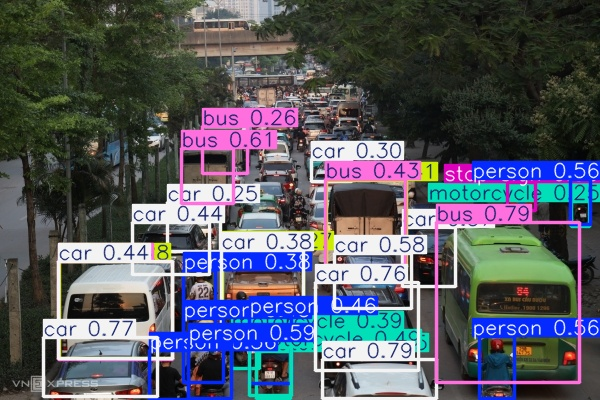

In [11]:
from ultralytics import YOLO
from IPython.display import Image, display
from google.colab import files

# YOLO 모델 로드
model = YOLO('yolov8n.pt')

# 파일 업로드 후 파일 경로 확인
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# 이미지 예측
results = model(image_path)

# 첫 번째 결과를 저장
first_result = results[0]

# 저장할 파일 경로를 지정
save_path = '/content/result.jpg'

# 결과를 저장 (save_dir 대신 filename 사용)
first_result.save(filename=save_path)

# 결과 이미지 표시
display(Image(save_path))




얼굴 인식

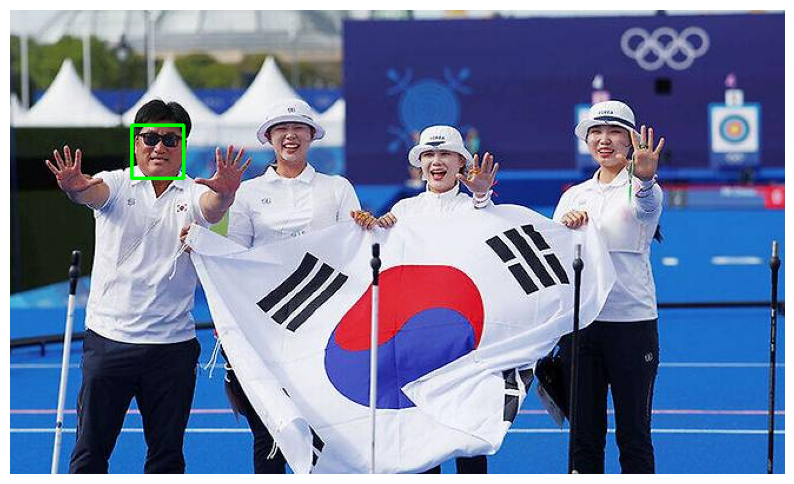

In [13]:
!pip install dlib opencv-python
from matplotlib import pyplot as plt
import cv2
import dlib
import numpy as np
import urllib.request
def download_image(image_url):
    resp = urllib.request.urlopen(image_url)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    return image
def detect_faces(image):
    detector = dlib.get_frontal_face_detector()
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = detector(gray, 1)
    for face in faces:
        x, y, w, h = face.left(), face.top(), face.width(), face.height()
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
    return image
def show_image(image):
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()
# URL 수정 필요
image_url = "https://img4.daumcdn.net/thumb/R658x0.q70/?fname=https://t1.daumcdn.net/news/202407/29/segye/20240729005927718rivm.jpg"
image = download_image(image_url)
image_with_faces = detect_faces(image)
show_image(image_with_faces)


In [ ]:
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

# 이미지 캡처
image_path = take_photo() # 'photo.jpg' 파일에 이미지 저장



<IPython.core.display.Javascript object>